<h1 align="center">Facial Recognition</h1>

    Elijah Cox
    November 2020

    Problems from the lab materials from Foundations of Applied Mathematics, Volume 1
    by Jeffrey Humpherys, Tyler J. Jarvis, and Emily J. Evans

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
import scipy.linalg as la

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

In [3]:
def show(image, m=200, n=180, labels=None):
    """Plot the flattened grayscale 'image' of width 'n' and height 'm'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    
    if type(image) == str:
        original = imread(image,as_gray=True).reshape((m,n))
        plt.imshow(original,cmap='gray')
    elif type(image) == list:
        for i,img in enumerate(image):
            plt.subplot(1,len(image),i+1)
            if labels is not None:
                plt.title(labels[i])
            original = img.reshape((m,n))
            plt.imshow(original,cmap='gray')
            plt.axis('off')
    else:
        original = image.reshape((m,n))
        plt.imshow(original,cmap='gray')
    plt.axis('off')
    plt.show()

In [59]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flattened images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flattened images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        self.F = get_faces(path=path)
        self.m,self.n = 200,180
        self.mu = np.mean(self.F, axis=1)
        self.Fbar = self.F - self.mu[:,np.newaxis]
        self.U = la.svd(self.Fbar,full_matrices=False)[0]
        # self.Fhat = self.project(self.F,s)
        
    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        return self.U[:,:s+1].T @ A

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        ghat = self.project(g - self.mu,s)
        Fhat = self.project(self.Fbar,s)
        n = Fhat.shape[1]
        min_of = [la.norm(Fhat[:,i]-ghat) for i in range(n)]
        j = np.argmin(min_of)
        return j #,min_of[j],min_of[0] 

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        j = self.find_nearest(image,s=s) # Index of the best match
        show([image,self.F[:,j]],m=m,n=n,labels=['Original','Best Match'])

    def rand_face(self,k,l):
        """Show a face using a function of each eigenface, with k,l as parameters.
        """
        face = np.ones_like(self.F[:,0])
        coeffs = [max((k-l*i),1)**i for i in np.arange(len(self.U))[::]] # Modify this function of k,l for different result
        for i in range(len(self.U)-2):
            try:
                face += coeffs[i]*self.U[:,i] 
            except IndexError:
                continue
        show(face)
    def rand_face2(self):
        """Show a random face from the collection in self.F.
        """
        face = [[]]*self.F.shape[0]
        for i in range(self.F.shape[0]):
            face[i] = self.F[:,np.random.randint(0,self.F.shape[0])]
        face = np.array(face)
        show(face)

In [6]:
data = FacialRec()

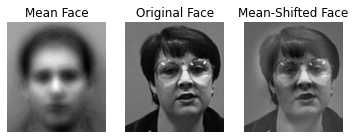

In [7]:
show([data.mu,data.F[:,13],data.Fbar[:,13]],labels=['Mean Face','Original Face','Mean-Shifted Face'])

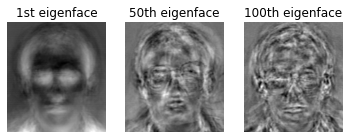

In [8]:
show([-data.U[:,0],data.U[:,49],data.U[:,99]],labels=['1st eigenface','50th eigenface','100th eigenface'])

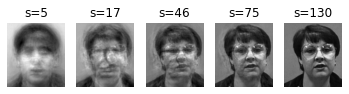

In [9]:
show([data.U[:,:i+1] @ data.project(data.Fbar[:,13],i) + data.mu for i in [5,17,46,75,130]],labels=[f's={s}' for s in [5,17,46,75,130]])   

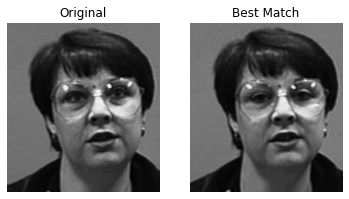

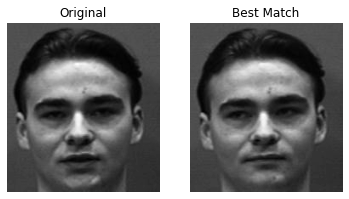

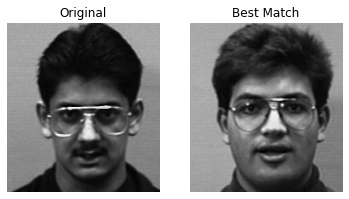

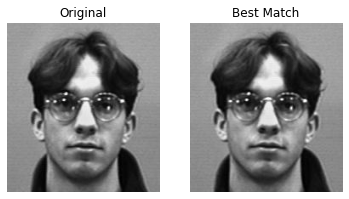

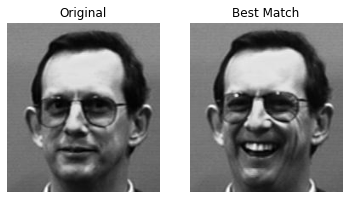

In [40]:
for test_image in sample_faces(5):
    data.match(test_image)

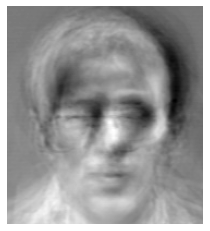

In [61]:
data.rand_face(9999999,1000000)